In [5]:
import numpy as np
import pandas as pd

from category_encoders import BinaryEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pylab as plt
import seaborn as sns

In [6]:
df = pd.read_csv("asteroid.csv")
df.head(5)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [8]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [9]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [10]:
#dropping columns and keeping only the needed ones 
df = df[['spkid', 'full_name', 'orbit_id',
    'e', 'a', 'q', 'i', 'n', 'tp', 'per', 'per_y',
       'class',
       'rms']].copy()

In [11]:
df.describe()

,spkid,e,a,q,i,n,tp,per,per_y,rms
count,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,958522.000000
mean,3.810114e+06,0.156116,2.902143,2.394887,9.054901,2.366846e-01,2.458856e+06,5.085344e+03,1.392287e+01,0.561153
std,6.831541e+06,0.092643,39.719503,2.139246,6.637656,7.941705e-02,1.580506e+03,2.308961e+06,6.321581e+03,2.745700
min,2.000001e+06,0.000000,-14702.447872,0.070511,0.007744,1.608247e-07,2.283183e+06,1.511918e+02,0.000000e+00,0.000000
25%,2.239632e+06,0.092193,2.387835,1.971401,4.165419,1.894969e-01,2.458560e+06,1.347738e+03,3.689903e+00,0.518040
50%,2.479262e+06,0.145002,2.646969,2.225816,7.415665,2.288655e-01,2.458945e+06,1.572976e+03,4.306571e+00,0.566280
75%,3.752518e+06,0.200650,3.001932,2.578315,12.407550,2.671142e-01,2.459361e+06,1.899765e+03,5.201272e+00,0.613927
max,5.401723e+07,1.855356,33488.895955,80.398819,175.082901,2.381082e+00,2.546362e+06,2.238462e+09,6.128574e+06,2686.600000


In [12]:
df.isna().sum()

spkid        0
full_name    0
orbit_id     0
e            0
a            0
q            0
i            0
n            0
tp           0
per          4
per_y        1
class        0
rms          2
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958518 entries, 0 to 958523
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   spkid      958518 non-null  int64  
 1   full_name  958518 non-null  object 
 2   orbit_id   958518 non-null  object 
 3   e          958518 non-null  float64
 4   a          958518 non-null  float64
 5   q          958518 non-null  float64
 6   i          958518 non-null  float64
 7   n          958518 non-null  float64
 8   tp         958518 non-null  float64
 9   per        958518 non-null  float64
 10  per_y      958518 non-null  float64
 11  class      958518 non-null  object 
 12  rms        958518 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 102.4+ MB


In [15]:
df.head(5)

,spkid,full_name,orbit_id,e,a,q,i,n,tp,per,per_y,class,rms
0,2000001,1 Ceres,JPL 47,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,1683.145703,4.608202,MBA,0.43301
1,2000002,2 Pallas,JPL 37,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,1687.410992,4.619880,MBA,0.35936
2,2000003,3 Juno,JPL 112,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,1592.013769,4.358696,MBA,0.33848
3,2000004,4 Vesta,JPL 35,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,1325.432763,3.628837,MBA,0.39980
4,2000005,5 Astraea,JPL 114,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,1508.414421,4.129814,MBA,0.52191


In [16]:
df.corr()

,spkid,e,a,q,i,n,tp,per,per_y,rms
spkid,1.000000,0.010955,0.000132,-0.002112,0.013449,0.003200,-0.002935,0.000032,0.000032,0.008187
e,0.010955,1.000000,0.022157,-0.119584,0.127764,0.196352,-0.053729,0.012076,0.012076,-0.004901
a,0.000132,0.022157,1.000000,0.083361,0.038835,-0.030021,-0.007611,0.981576,0.981576,-0.000571
q,-0.002112,-0.119584,0.083361,1.000000,0.035495,-0.328304,-0.085348,0.005505,0.005505,-0.005382
i,0.013449,0.127764,0.038835,0.035495,1.000000,-0.012030,-0.026820,0.026047,0.026047,-0.003628
n,0.003200,0.196352,-0.030021,-0.328304,-0.012030,1.000000,-0.016632,-0.004601,-0.004601,0.004960
tp,-0.002935,-0.053729,-0.007611,-0.085348,-0.026820,-0.016632,1.000000,-0.000219,-0.000219,0.004053
per,0.000032,0.012076,0.981576,0.005505,0.026047,-0.004601,-0.000219,1.000000,1.000000,-0.000065
per_y,0.000032,0.012076,0.981576,0.005505,0.026047,-0.004601,-0.000219,1.000000,1.000000,-0.000065
rms,0.008187,-0.004901,-0.000571,-0.005382,-0.003628,0.004960,0.004053,-0.000065,-0.000065,1.000000


<AxesSubplot:>

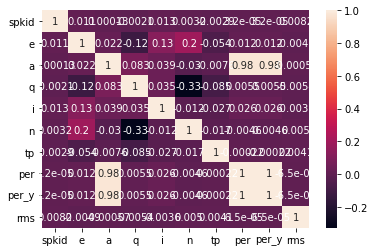

In [17]:
sns.heatmap(df.corr(), annot= True)

In [18]:
#dropping the columns with very high correlation 
df.drop(['per', 'per_y'], axis=1, inplace=True)

In [19]:
df.describe()

,spkid,e,a,q,i,n,tp,rms
count,9.585180e+05,958518.000000,958518.000000,958518.000000,958518.000000,9.585180e+05,9.585180e+05,958518.000000
mean,3.810116e+06,0.156111,2.925310,2.394848,9.054551,2.366851e-01,2.458856e+06,0.561154
std,6.831562e+06,0.092612,35.958057,2.139056,6.634827,7.941468e-02,1.580188e+03,2.745705
min,2.000001e+06,0.000000,0.555418,0.070511,0.007744,1.608247e-07,2.283183e+06,0.000000
25%,2.239631e+06,0.092192,2.387837,1.971400,4.165391,1.894971e-01,2.458560e+06,0.518040
50%,2.479260e+06,0.145001,2.646970,2.225815,7.415614,2.288656e-01,2.458945e+06,0.566280
75%,3.752516e+06,0.200649,3.001933,2.578310,12.407445,2.671143e-01,2.459361e+06,0.613930
max,5.401723e+07,0.999851,33488.895955,80.398819,175.082901,2.381082e+00,2.546362e+06,2686.600000


In [20]:
df.rename(columns={'class':'c'}, inplace=True)

In [21]:
df.head(5)

,spkid,full_name,orbit_id,e,a,q,i,n,tp,c,rms
0,2000001,1 Ceres,JPL 47,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,MBA,0.43301
1,2000002,2 Pallas,JPL 37,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,MBA,0.35936
2,2000003,3 Juno,JPL 112,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,MBA,0.33848
3,2000004,4 Vesta,JPL 35,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,MBA,0.39980
4,2000005,5 Astraea,JPL 114,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,MBA,0.52191


In [22]:
len(df.c.unique())

12

In [23]:
df.drop(['spkid', 'full_name'], axis = 1, inplace= True)

In [24]:
df.head(5)

,orbit_id,e,a,q,i,n,tp,c,rms
0,JPL 47,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,MBA,0.43301
1,JPL 37,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,MBA,0.35936
2,JPL 112,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,MBA,0.33848
3,JPL 35,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,MBA,0.39980
4,JPL 114,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,MBA,0.52191


In [25]:
#binary encoding the column orbit_id as it has a lot of columns
encoded_orbit_id = BinaryEncoder().fit_transform(df['orbit_id'])
df_encoded_orbit_id = pd.DataFrame(encoded_orbit_id)
df_encoded_orbit_id.head(5)

,orbit_id_0,orbit_id_1,orbit_id_2,orbit_id_3,orbit_id_4,orbit_id_5,orbit_id_6,orbit_id_7,orbit_id_8,orbit_id_9,orbit_id_10,orbit_id_11,orbit_id_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1


In [26]:
#one hot encoding the column 'c' as it has fewer columns
value_c = df['c'].values.reshape(-1,1)
encoded_c = OneHotEncoder().fit_transform(df['c'])
df_encoded_c = pd.DataFrame(encoded_c)
df_encoded_c.head(5)

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df['c'].value_counts()

MBA    855953
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3467
ATE      1729
CEN       506
AST        76
IEO        22
Name: c, dtype: int64

In [28]:
#replacing columns c and orbit_id with its encoded one
df.drop(['c','orbit_id'], axis = 1, inplace=True )

df_output = pd.concat([df, df_encoded_c, df_encoded_orbit_id], axis = 1 )
df_output.head(5)

,e,a,q,i,n,tp,rms,c_1,c_2,c_3,...,orbit_id_3,orbit_id_4,orbit_id_5,orbit_id_6,orbit_id_7,orbit_id_8,orbit_id_9,orbit_id_10,orbit_id_11,orbit_id_12
0,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,0.43301,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,0.35936,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,0.33848,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,0.39980,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,0.52191,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [29]:
y = df_output['rms']
df_output.drop(['rms'], inplace= True, axis= 1)

X = df_output.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

In [30]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

#dropping columns with correlation 0.7 and higher
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for all pairs of columns
corr_matrix = X_train[numerical_columns].corr().abs()
  
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  
# Find pairs of columns with a correlation coefficient of 0.8 or higher
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
  
# Drop the selected columns from your dataset
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [31]:
#function for performance metrics
def performance(y_test, y_pred):
    print(f"r2_score is: {r2_score(y_test, y_pred)}")
    print(f"mse is: {mean_squared_error(y_test, y_pred)}")

In [ ]:
#modules to import 
from xgboost import XGBRegressor

#hyperparameters to fit and select the best
n_estimators = [50, 100 , 200 , 400 ]
max_depths = [5, 10 , 20, 30]

for n_estimator in n_estimators:
    for max_depth in max_depths:
        #training the random forest regressor
        forest_regressor = XGBRegressor(n_estimators=n_estimator, max_depth= max_depth, random_state= 42)

        #predicting the outcomes
        y_pred = forest_regressor.fit(X_train, y_train).predict(X_test)

        #printing the performance metrics
        print(f"for n_estimators = {n_estimator} and max_depth = {max_depth}")
        print(f"r2_score is: {r2_score(y_test, y_pred)}")
        print(f"mse is: {mean_squared_error(y_test, y_pred)}")
        

for n_estimators = 50 and max_depth = 5
r2_score is: 0.2813209848553587
mse is: 0.00870626039096483
for n_estimators = 50 and max_depth = 10
r2_score is: 0.2860818927507106
mse is: 0.008648585541747212
for n_estimators = 50 and max_depth = 20
r2_score is: 0.2517320755834922
mse is: 0.009064707964049536
for n_estimators = 50 and max_depth = 30
r2_score is: 0.19039672999577129
mse is: 0.00980773994161332
for n_estimators = 100 and max_depth = 5
r2_score is: 0.28008246470809584
mse is: 0.008721264139055843
for n_estimators = 100 and max_depth = 10
r2_score is: 0.2808615064221446
mse is: 0.00871182662957664
